In [1]:
import numpy as np
import tifffile as tiff

In [2]:
test_MAX=tiff.imread('C:/Temp/MAX_14-16_HammerTime.tif')

In [3]:
test_MAX.shape

(872, 714, 996)

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

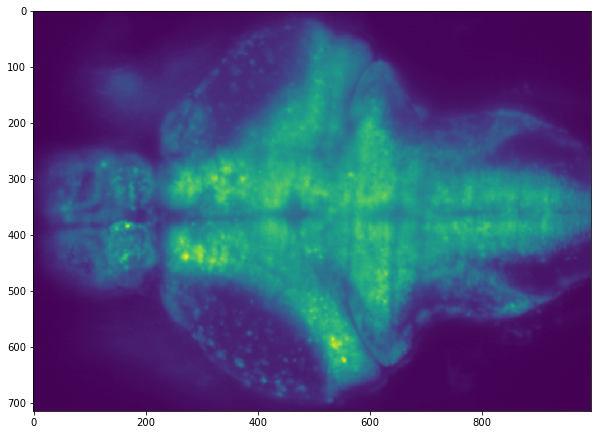

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(test_MAX[1])

In [7]:
temp=test_MAX.copy().astype('float32')
for ij in range(0,test_MAX.shape[1]):
    for ik in range(0,test_MAX.shape[2]):
        F0=np.convolve(test_MAX[:,ij,ik], np.ones((50,))/50, mode='same')
        temp[:,ij,ik]=(test_MAX[:,ij,ik]-F0)/F0

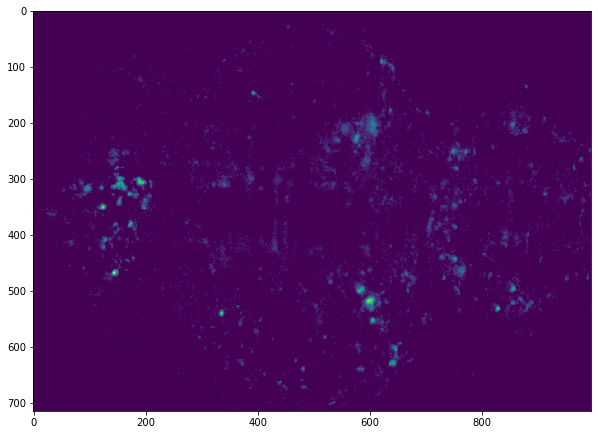

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(temp[100],vmin=0.02)

In [23]:
np.save('c:\\temp\HammerDF_F.npy',temp)

In [10]:
from bokeh.io import curdoc
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, Slider
from bokeh.plotting import figure,show

In [12]:
frames=list(range(0,temp.shape[0]))
source = ColumnDataSource(data=dict(image=[temp[0,:,:]]))


p_img = figure(x_range=(0,temp.shape[1]), y_range=(0, temp.shape[2]))
im=p_img.image(image='image', x=0, y=0, source=source, palette="Spectral11")

slider = Slider(start=frames[0], end=frames[-1], value=frames[0],step=1, title="Frame")

def update(attr, old, new):
    source.data = dict(image=[data[slider.value,:, :]])

slider.on_change('value', update)

curdoc().add_root(column(p_img, slider))

In [14]:
show(p_img)

In [1]:
import os,glob

In [2]:
path='R:/ENSDEV20-Q3066/ForAnalysis/MIPsANTs/Done'

In [61]:
suite2p_list=glob.glob(path+'/*/')
image_list=glob.glob(path+'/*.tif')

In [10]:
suite2p_list[0] + '    ' + image_list[0]

'R:/ENSDEV20-Q3066/ForAnalysis/MIPsANTs/Done\\MAX_GV_20200730_fish2_ENSGF_6DPF_range110_step5_exposure21_power60_00000_LongReg_3D.tif    R:/ENSDEV20-Q3066/ForAnalysis/MIPsANTs/Done\\MAX_GV_20200731_fish4_ENSFed_7DPF_range140_step5_exposure17_power60_00000_LongReg_3D.tif'

In [62]:
for i in range(0,len(suite2p_list)):
    suite2p_list[i]=suite2p_list[i].replace('suite2p_','').replace('.tif\\','.tif')

In [17]:
counter=1
for i in range(0,len(image_list)):
    if set(suite2p_list).intersection(image_list[i]):
        counter+=1

In [35]:
image_list2

['R:/ENSDEV20-Q3066/ForAnalysis/MIPsANTs/Done\\MAX_GV_20200731_fish4_ENSFed_7DPF_range140_step5_exposure17_power60_00000_LongReg_3D.tif',
 'R:/ENSDEV20-Q3066/ForAnalysis/MIPsANTs/Done\\MAX_GV_20200727_fish3_ENS_3DPF_range120_step5_exposure20_power60_00000_LongReg_3D.tif',
 'R:/ENSDEV20-Q3066/ForAnalysis/MIPsANTs/Done\\MAX_GV_20200730_fish6_ENSFed_6DPF_range110_step5_exposure21_power60_00000_LongReg_3D.tif',
 'R:/ENSDEV20-Q3066/ForAnalysis/MIPsANTs/Done\\suite2p_MAX_GV_20200730_fish2_ENSGF_6DPF_range110_step5_exposure21_power60_00000_LongReg_3D.tif',
 'R:/ENSDEV20-Q3066/ForAnalysis/MIPsANTs/Done\\suite2p_MAX_GV_20200731_fish2_ENS_7DPF_range110_step5_exposure21_power60_00000_LongReg_3D.tif',
 'R:/ENSDEV20-Q3066/ForAnalysis/MIPsANTs/Done\\suite2p_MAX_GV_20200729_fish7_ENS_5DPF_range120_step5_exposure20_power60_00000_LongReg_3D.tif',
 'R:/ENSDEV20-Q3066/ForAnalysis/MIPsANTs/Done\\suite2p_MAX_GV_20200729_fish4_ENSGF_5DPF_range100_step5_exposure23_power60_00000_LongReg_3D.tif',
 'R:/ENSDEV20

In [63]:
image_list2=list([x for x in image_list if 'suite2p' not in x])
len(image_list2)

59

In [64]:
s = set(suite2p_list)
temp3 = [x for x in image_list2 if x not in s]
temp2 = [x for x in image_list2 if x in s]

In [65]:
len(temp3)

0

In [59]:
temp2

['R:/ENSDEV20-Q3066/ForAnalysis/MIPsANTs/Done\\MAX_GV_20200731_fish4_ENSFed_7DPF_range140_step5_exposure17_power60_00000_LongReg_3D.tif',
 'R:/ENSDEV20-Q3066/ForAnalysis/MIPsANTs/Done\\MAX_GV_20200727_fish3_ENS_3DPF_range120_step5_exposure20_power60_00000_LongReg_3D.tif',
 'R:/ENSDEV20-Q3066/ForAnalysis/MIPsANTs/Done\\MAX_GV_20200730_fish6_ENSFed_6DPF_range110_step5_exposure21_power60_00000_LongReg_3D.tif',
 'R:/ENSDEV20-Q3066/ForAnalysis/MIPsANTs/Done\\MAX_GV_20200729_fish5_ENSFed_5DPF_range140_step5_exposure17_power60_00000_LongReg_3D.tif',
 'R:/ENSDEV20-Q3066/ForAnalysis/MIPsANTs/Done\\MAX_GV_20200730_fish6_ENS_6DPF_range130_step5_exposure18_power60_00000_LongReg_3D.tif',
 'R:/ENSDEV20-Q3066/ForAnalysis/MIPsANTs/Done\\MAX_GV_20200730_fish2_ENS_6DPF_range140_step5_exposure17_power60_00000_LongReg_3D.tif',
 'R:/ENSDEV20-Q3066/ForAnalysis/MIPsANTs/Done\\MAX_GV_20200731_fish5_ENSGF_7DPF_range100_step5_exposure23_power60_00000_LongReg_3D.tif',
 'R:/ENSDEV20-Q3066/ForAnalysis/MIPsANTs/Don

In [42]:
file

(0,
 'R:/ENSDEV20-Q3066/ForAnalysis/MIPsANTs/Done\\MAX_GV_20200727_fish5_ENSGF_3DPF_range120_step5_exposure20_power60_00000_LongReg_3D.tif')

In [60]:
for i,file in enumerate(temp3):    
    os.rename(file,file.replace('/Done\\','/'))
    #print(file.replace('/Done\\','/'))
    

In [48]:
file

'R:/ENSDEV20-Q3066/ForAnalysis/MIPsANTs/Done\\MAX_GV_20200727_fish6_ENS_3DPF_range140_step5_exposure17_power60_00000_LongReg_3D.tif'

In [49]:
os.rename(file,file.replace('/Done\\','/'))